In [1]:
from IPython.core.display import HTML
HTML("""<style>
.answers { 
    visibility: hidden;
}
</style>""")

In [2]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'simple',
              'transition': 'convex',
              'start_slideshow_at': 'selected'
})

{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'convex'}

# Python Analysis Figures
Author: Barron H. Henderson

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Development/GCandPython/working


`%matplotlib` prevents importing * from pylab and numpy


# Data for Figures

In this exercise, we will use publicly available data to create some pretty plots that combine GEOS-Chem results with observations from the DC8 aircraft on the DC3 campaign.

# Downloads
Download Merged Observations from DC8 aircraft during the DC3 campaing.
http://www-air.larc.nasa.gov/cgi-bin/enzFile?e38EE03EFAE02C04F06E9647DAF98F48D6A2f7075622d6169722f534541433452532d4443332f4d45524745532f315f4d494e5554452e4443385f4d52472f6463332d6d726736302d6463385f6d657267655f32303132303531385f52375f7468727532303132303632322e696374

curl -LO ftp.as.harvard.edu/gcgrid/geos-chem/1yr_benchmarks/v10-01/v10-01-public-release/Run0/tracerinfo.dat
curl -LO ftp.as.harvard.edu/gcgrid/geos-chem/1yr_benchmarks/v10-01/v10-01-public-release/Run0/diaginfo.dat
curl -LO ftp.as.harvard.edu/gcgrid/geos-chem/1yr_benchmarks/v10-01/v10-01-public-release/Run0/bpch.tar.gz
curl -LO ftp.as.harvard.edu/gcgrid/geos-chem/1yr_benchmarks/v10-01/v10-01-public-release/Run0/netcdf.tar.gz

# Extract the data
tar xzf bpch.tar.gz bpch/ctm.bpch.v10-01-public-Run0.2013010100

# CHECK POINT:
List the size of of the file you downloaded

# ANSWERS Hidden

<div class="answers">
```
296M ctm.bpch.v10-01-public-Run0.2013050100
296M ctm.bpch.v10-01-public-Run0.2013050100
31M dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict
```
</div>

# 30 Minutes

# Intro to the Common Data Model

1. files and groups
2. dimensions
3. properties
4. variables
5. Conventions
  * IOAPI and WRF-IOAPI
  * COARDS
  * Climate Forecasting (CF) Conventions
6. Conceptualizing any data set as CDM

In [4]:
!pncdump.py --header -f ffi1001 icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict

PseudoNetCDF.icarttfiles.ffi1001.ffi1001 icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict {
dimensions:
        POINTS = 6817 ;

variables:
        double Fractional_Day(POINTS);
                Fractional_Day:units = "Fractional_Day, none" ;
                Fractional_Day:standard_name = "Fractional_Day" ;
                Fractional_Day:missing_value = -999999 ;
                Fractional_Day:fill_value = -999999.0 ;
                Fractional_Day:scale = 1.0 ;
                Fractional_Day:llod_flag = -888888 ;
                Fractional_Day:llod_value = "N/A" ;
                Fractional_Day:ulod_flag = -777777 ;
                Fractional_Day:ulod_value = "N/A" ;
        double UTC(POINTS);
                UTC:units = "s" ;
                UTC:standard_name = "UTC" ;
                UTC:missing_value = -999999 ;
                UTC:fill_value = -999999.0 ;
                UTC:scale = 1 ;
                UTC:llod_flag = -888888 ;
                UTC:llod_value = "N/A" ;
    

# CHECK POINT

1. What attributes does the IAS variable have?

    -
    
2. What attributes does the file have?

    -
     

In [5]:
!pncdump.py --header -f bpch bpch/ctm.bpch.v10-01-public-Run0.2013050100

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/geoschemfiles/_bpch.py:866:UserWarning:
  vertgrid selected (GEOS-5-REDUCED) and output layers are not consistent; update to GEOS-5-NATIVE (e.g., bpch(..., vertgrid='GEOS-5-NATIVE') -f "bpch,vertgrid='GEOS-5-NATIVE'"
PseudoNetCDF.geoschemfiles._bpch.bpch bpch/ctm.bpch.v10-01-public-Run0.2013050100 {
dimensions:
        longitude = 72 ;
        latitude = 46 ;
        layer = 47 ;
        nv = 2 ;
        tnv = 2 ;
        layer1 = 1 ;
        layer59 = 59 ;
        layer72 = 72 ;
        layer73 = 73 ;
        layer_bounds = 48 ;
        time = UNLIMITED // (1 currently) 

variables:
        float PL-SUL=$_SO2dms(time, layer59, latitude, longitude);
                PL-SUL=$_SO2dms:scale = 1.0 ;
                PL-SUL=$_SO2dms:carbon = 1 ;
                PL-SUL=$_SO2dms:standard_name = "PL-SUL=$_SO2dms" ;
                PL-SUL=$_SO2dms:tracerid = 1 ;
                PL-SUL=$_SO2dms:grid_mapping = "crs" ;
                PL


# 30 minutes

# Common Processing and Terminology

This section will explain many of the techniques used in the tile plot section and in all subsequent sections.

1. slicing in numpy
2. dimensional reductions
3. Loading data from different formats
  * CMAQ (already done)
  * CAMx, WRF, GEOS-Chem, CSV, NASA AMES, AQS
4. Adding coordinate variables
5. Using named dimensions via PseudoNetCDF
6. Adding derived variables via PseudoNetCDF

# 30 minutes

## Time series

Make time series plots with 3 different methods from CMAQ data.

1. Python Environment
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS)
4. Advanced users will add observations
5. Advanced users will add another species on a secondary axis
6. Advanced users will repeat with CAMx or GEOS-Chem

# Python Environment

1. Start easy with a 2-d line plot
2. Add real data
3. Transform data to time.

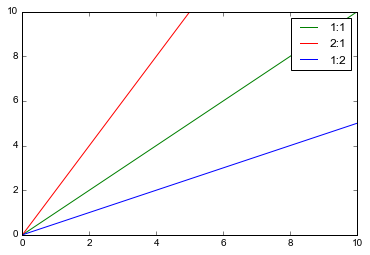

In [6]:
close()
plot([0,10], [0,10], linestyle = '-', color = 'g', label = '1:1')
plot([0,5], [0,10], linestyle = '-', color = 'r', label = '2:1')
plot([0,10], [0,5], linestyle = '-', color = 'b', label = '1:2')
legend()
#savefig('temp.png')

# Python with real data

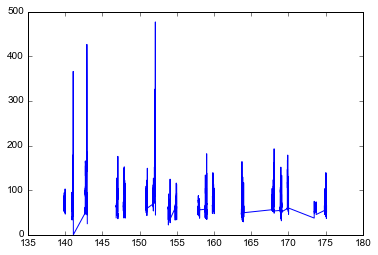

In [7]:
from PseudoNetCDF import PNC
args = PNC('--format=ffi1001', 'icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict')
infile = args.ifiles[0]
fdays = infile.variables['Fractional_Day']
o3 = infile.variables['O3_ESRL']
plot(fdays, o3)

# Python with date

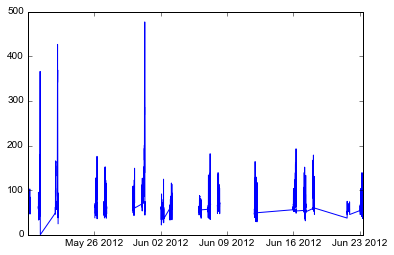

In [8]:
import datetime
from PseudoNetCDF import PNC
args = PNC('--format=ffi1001', 'icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict')
infile = args.ifiles[0]
fdays = infile.variables['Fractional_Day']
o3 = infile.variables['O3_ESRL']
offset = datetime.datetime(2011, 12, 31).timestamp()
xdate = [datetime.datetime.utcfromtimestamp(offset + fday * 24*3600) for fday in fdays]
plot(xdate, o3)

# Python with pretty date

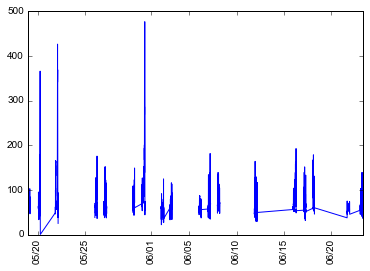

In [9]:
import datetime
from PseudoNetCDF import PNC
args = PNC('--format=ffi1001', 'icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict')
infile = args.ifiles[0]
fdays = infile.variables['Fractional_Day']
o3 = infile.variables['O3_ESRL']
offset = datetime.datetime(2011, 12, 31).timestamp()
xdate = [datetime.datetime.utcfromtimestamp(offset + fday * 24*3600) for fday in fdays]
plot(xdate, o3)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(bymonthday = [1, 5, 10, 15, 20, 25]))
plt.setp(ax.get_xticklabels(), rotation = 90);

# Timeseries using PNC

Your goal: Make a time series plot like the one above using the command line.

In [10]:
!pncts.py --help

usage: pncts.py [-h] [--pnc PNC]
                [-f {see --list-formats for choices}]
                [--list-format] [--help-format HELPFORMAT]
                [--sep] [--inherit] [--mangle]
                [--rename RENAME]
                [--remove-singleton REMOVESINGLETON] [-O]
                [--out-format {NETCDF3_CLASSIC,NETCDF4_CLASSIC,NETCDF4,bpch,cloud_rain,csv,ffi1001,height_pressure,humidity,landuse,lateral_boundary,one3d,point_source,temperature,uamiv,vertical_diffusivity,wind,camxfiles.cloud_rain,camxfiles.height_pressure,camxfiles.humidity,camxfiles.landuse,camxfiles.lateral_boundary,camxfiles.one3d,camxfiles.point_source,camxfiles.temperature,camxfiles.uamiv,camxfiles.vertical_diffusivity,camxfiles.wind}]
                [--mode {w,a,r+,ws,as,r+s}] [--verbose]
                [--dump-name CDLNAME] [--coordkeys key1,key2]
                [-v varname1[,varname2[,...,varnameN]]
                [-a att_nm,var_nm,mode,att_typ,att_val]
                [-m MASKS] [--from-con

# 10 minutes

## Scatter Plots

1. Python Environment (replace plot with scatter, utc with some other variable)
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS) (replace pncts.py with pncscatter.py)
4. Advanced users will switch from time/space paired to rank paired

# 30 minutes

# Tile Plots

Make tile plots of ozone with 3 different methods from CMAQ data.

1. Python Environment
2. Python with PseudoNetCDF
3. Command Line Interface (terminal or DOS)
4. Advanced users will overlay observations
5. Advanced users will repeat with CAMx or GEOS-Chem

# Python only

In [11]:
from PseudoNetCDF import PNC
args = PNC("--format=bpch,vertgrid='GEOS-5-NATIVE',nogroup=('IJ-AVG-$',)",
           "bpch/ctm.bpch.v10-01-public-Run0.2013050100")
infile = args.ifiles[0]
latb = infile.variables['latitude_bounds']
lonb = infile.variables['longitude_bounds']
ozone = infile.variables['O3'][:, 0].mean(0)

In [12]:
lone = np.append(lonb[0,0], lonb[:, 1])
late = np.append(latb[0,0], latb[:, 1])
LON, LAT = np.meshgrid(lone, late)

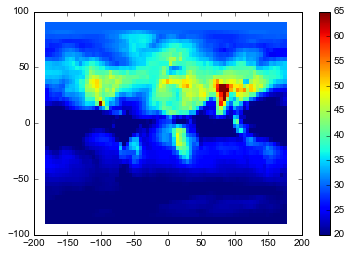

In [13]:
close()
pcolor(LON, LAT, ozone, vmin = 20, vmax = 65)
colorbar();

# With PNC Mapping

In [14]:
from PseudoNetCDF.coordutil import getmap
m = getmap(infile, resolution = 'c')

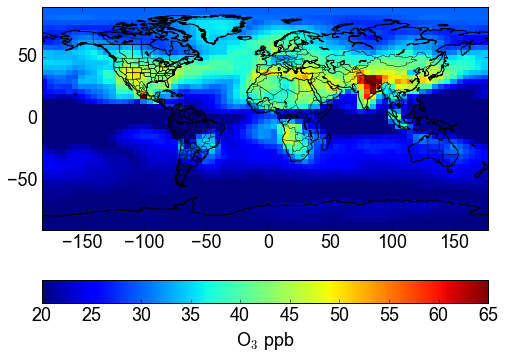

In [15]:
rcParams['font.size'] = 18
close()
figure(figsize = (8, 6), dpi = 100)
m.pcolor(LON, LAT, ozone, vmin = 20, vmax = 65)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
cb = plt.colorbar(orientation = 'horizontal', label = 'O$_3$ ppb')

# CLI PseudoNetCDF

In [16]:
!pncmap.py -v O3 -f "bpch,nogroup=('IJ-AVG-$',)" \
-s layer72,0 -r time,mean --norm="Normalize(vmin=0,vmax=80)" bpch/ctm.bpch.v10-01-public-Run0.2013050100 map
%pwd

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/geoschemfiles/_bpch.py:866:UserWarning:
  vertgrid selected (GEOS-5-REDUCED) and output layers are not consistent; update to GEOS-5-NATIVE (e.g., bpch(..., vertgrid='GEOS-5-NATIVE') -f "bpch,vertgrid='GEOS-5-NATIVE'"


'/Users/barronh/Development/GCandPython/working'

![Simple Tile Plot](working/mapO3.png)

# Overlay Observations and Model 

# Find the range of space and time covered by the observations.

This is our first look at observations from the Common Data Model perspective. Remember: dimensions, properties, and variables (which have dimensions and properties).

##  Look at the header information

Those of you familiar with NetCDF are no doubt familiar with ncdump.  If you like ncdump, I think you'll love pncdump. pncdump has all the same capabilities as ncdump and more. If you use NCO or CDO, you'll be happy to see many of the same features -- sometimes by the same names. Like CDO, pnc tools are data format agnostic. For each format and metadata structure, someone writes a "middle-ware." The middle-ware is much like the netcdf-java Common Data Model Input/Output Service Provider, and that means data is translated to the dimensions, properties, variables (which have dimensions and properties).

The Common Data Model is most useful when dimensions can be directly translated to physical time and space. pnc tools, like CDO, help by creating a common internal standard.

In [17]:
!pncdump.py --header -f ffi1001 icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict

PseudoNetCDF.icarttfiles.ffi1001.ffi1001 icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict {
dimensions:
        POINTS = 6817 ;

variables:
        double Fractional_Day(POINTS);
                Fractional_Day:units = "Fractional_Day, none" ;
                Fractional_Day:standard_name = "Fractional_Day" ;
                Fractional_Day:missing_value = -999999 ;
                Fractional_Day:fill_value = -999999.0 ;
                Fractional_Day:scale = 1.0 ;
                Fractional_Day:llod_flag = -888888 ;
                Fractional_Day:llod_value = "N/A" ;
                Fractional_Day:ulod_flag = -777777 ;
                Fractional_Day:ulod_value = "N/A" ;
        double UTC(POINTS);
                UTC:units = "s" ;
                UTC:standard_name = "UTC" ;
                UTC:missing_value = -999999 ;
                UTC:fill_value = -999999.0 ;
                UTC:scale = 1 ;
                UTC:llod_flag = -888888 ;
                UTC:llod_value = "N/A" ;
    

# CHECK POINT 2:

What are the dimensions in this file?

List 4 variable names that can be used to answer area  of interest

1. _
2. _
3. _
4. _

# ANSWERS Hidden

<div class="answers">

* Dimensions = POINTS
* Variables: LATITUDE,LONGITUDE,PRESSURE,Fractional_Day

</div>

# Get the range of values (min, median, max) for each variable

Start by reviewing the pncdump.py options below using the help option (`pncdump -h`, `pncdump --help`)

- -v, --variables
- -r, --reduce
```
pncdump.py -v VARNAME1,VARNAME2,VARNAME3,VARNAME4 -r DIMNAME1,func icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict
```

# CHECK POINT 3:
What are the minimum, mean, and maximum values for each variable?

* _
* _
* _
* _

# ANSWERS Hidden

<div class="answers">

- Fractional_Day: 139.7941, 157.178960334458, 175.1191
- LATITUDE: 30.9007476, 37.9106, 42.14375258
- LONGITUDE: 254.4531944, 263.1185, 280.9987551
- PRESSURE: 178.49335, 488.5554, 973.7353

</div>

# Apply a bounding box, layer, and time range for a tile plot.

## Review the variables available (derived and directly read)

```
$ pncdump.py --header  -f bpch bpch/ctm.bpch.v10-01-public-Run0.YYYYMMDDHH
```

CHECK POINT4a:
You should have gotten a warning and a message about how to solve it.  Use the --help-format option to review the options you have in the bpch reader.

- tracerinfo:
- diaginfo:
- mode:
- timeslice:
- noscale:
- vertgrid:
- nogroup:

Not sure for which option is used, there is no details in —help-format.

## Use pncdump.py again with the updated options.

CHECK POINT 4b:
What are the relevant dimensions in GEOS-Chem?

1. _
2. _
3. _
4. _

# ANSWERS Hidden

<div class="answers">

- time
- layer72
- latitude
- longitude

</div>

# CHECK POINT

What are the relevant coordinate variables in GEOS-Chem?

1. _
2. _
3. _
4. _

# ANSWERS Hidden

<div class="answers">

- time
- etam_pressure, PEDGE-$_PSURF
- latitude
- longitude

</div>

## Use pncdump with options to develop a bounding box

### Start with the horizontal bounding box

The command below will help you to identify the dimensions of interest.

```
$ pncdump.py [-t] [--full-indices=c] [-v varname1,varname2] -f bpch bpch/ctm.bpch.v10-01-public-Run0.YYYYMMDDHH
```

* Note that helpful, but not necessary options will be surrounded by square braces.

# CHECK POINT

Use the help option `pncdump.py -h` and describe what these options do.

- -t, --timestring
- --full-indices=c
- --full-indices=f

# CHECK POINT 6

What are the 0-based indices to create a time and horizontal bounding box for the dimensions of interest?

# ANSWERS Hidden

<div class="answers">

- time: 0,1
- latitude,28,36
- longitude,10,25

</div>

## The vertical layer can be selected in two ways.

### Using the eta pressure levels

bpch outputs the eta pressure levels on midpoints (etam_pressure) and on interfaces (etai_pressure). This variable uses a simple 1-dimensional definition and could be used to find the closest layer to the observational mean height. This approach would be identical to latitude or longitude above.

### Using PSURF

PSURF uses, more appropriately, a definition that includes the hyam + hyab * PSURF, but has multiple dimensions (time, layer72, latitude, and longitude). To get a best fit layer, we can take the mean or median across space and time after subletting to the spatial domain.

Construct slicing and reducing options as well as a convolve option. and describe what they do.

- -v PSURF
- -s, --slice
    - latitude
    - longitude
- -r, --reduce
    - latitude
    - longitude
- -c, --convolve
    - layer73

Design a nogroup keyword pass to the bpch reader.

- nogroup

#### CHECK POINT:

- Fill out the template command below
- What is the best layer72 index to use?

```
pncdump -f "bpch,vertgrid='GEOS-5-NATIVE',nogroup=<insert>" --full-indices=c <insert -v option> <insert -s options> <insert -r options> <insert -c option> path
```

# ANSWERS Hidden

<div class="answers">

- ```pncdump.py -f "bpch,vertgrid='GEOS-5-NATIVE',nogroup=('PEDGE-$',)" -c layer73,valid,0.5,0.5 --full-indices=c -v PSURF -r latitude,mean -r longitude,mean -s longitude,10,25 -s latitude,28,36  bpch/ctm.bpch.v10-01-public-Run0.2013050100```
- layer72 index = 22

</div>

# Make a map with just GEOS-Chem

pncmap.py is the primary map maker. Like all other pnc commands, it uses options that can be reviewed with --help. It shares all the same slicing, aggregating functions, but it also has a few options that are not included else where.

$ pncmap.py --help

Review the following options

- --matplotlibrc
- --figure-keywords
- --axes-keywords
- --plot-commands
- --figformat
- --norm
- --colorbar-formatter
- --overlay
- --resolution
- --no-countries, --states, --counties
- --shapefile
- --no-squeeze
- --iter

## Start by plotting the whole world for ozone at the surface layer

### Fill in the options below to plot may ozone at the surface

```
pncmap.py -v <VARNAME> -s <LAYERSLICE> -f "bpch,vertgrid='GEOS-5-NATIVE'" bpch/ctm.bpch.v10-01-public-Run0.2013050100 map
```

#### CHECK POINT:

- What warning do you get? How can you solve it?
- What was the file name of the saved figure? (hint: use the --verbose option)
- How could you change the pncmap.py call so that the VARNAME was just O3 and the output had just O3 in the label.

### Plot the average May/June value

- What does the --stack option do?
- How could you combine it with the  -r option to plot the average ozone in May and June?

*Note: the -f options are broadcast to both the May and June files. If they were different format (e.g., GEOS-Chem and ICARTT), we would need to treat them separately.

# Make a Map with just DC3 Observations

Hint: pncmap.py expects latitude and longitude (case sensitive). You can use --expr or --rename to fix the case and --coordkeys to ensure these variables are not plotted and immune to -v.

# Combining PNC commands

Notice that the commands necessary to open ICARTT (ffi1001) and GEOS-Chem (bpch) files were different. We can separate commands and apply them only to one file using the --pnc option. Make notes below about the pnc option:

## Now use one command to make both maps.

* Hint 1: Rename O3_ESRL to O3
* Hint 2: Escaping quotes is important
* Hint 3: Use --expr to redefine DC2 longitude on -182.5, 177.5 use np.where

# ANSWERS Hidden

<div class="answers">

```
pncmap.py --norm="Normalize(0, 100)" -v O3 \
--pnc " -f bpch,nogroup=(\'IJ-AVG-$\',),vertgrid=\'GEOS-5-NATIVE\' \
--stack=time -r time,mean -s layer72,22 -v O3 \
bpch/ctm.bpch.v10-01-public-Run0.2013050100 bpch/ctm.bpch.v10-01-public-Run0.2013060100" \
--pnc " -f ffi1001 --rename v,O3_ESRL,O3 --expr=\"latitude=LATITUDE;longitude=np.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)\" icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict" \
map
```

</div>

## Now lets make this map better!

- Focus in on the observations region
- Mask all observations that are not within the model layer pressures
- Add a title

# ANSWERS Hidden

<div class="answers">

- add "--overlay" option
- "--mask where,PRESSURE>515.7865 --mask where,PRESSURE<479.60059"
- --axes-keywords "title='one'" or --plot-commands "plt.title('one')"

</div> 

In [18]:
!pncmap.py --axes-keywords "title='one'" --overlay --norm="Normalize(0, 100)" -v O3 \
 --pnc " -f bpch,nogroup=(\'IJ-AVG-$\',),vertgrid=\'GEOS-5-NATIVE\' --stack=time -s latitude,28,36 -s longitude,10,25 -r time,mean -s layer72,22 -v O3 bpch/ctm.bpch.v10-01-public-Run0.2013050100 bpch/ctm.bpch.v10-01-public-Run0.2013060100" \
 --pnc " -f ffi1001 --mask where,PRESSURE>515.7865 --mask where,PRESSURE<479.60059 --rename v,O3_ESRL,O3 -v O3_ESRL,LATITUDE,LONGITUDE,PRESSURE --expr=\"latitude=LATITUDE;longitude=np.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)\" icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict" \
 map

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/core/_functions.py:827:UserWarning:
  Got duplicate variables for layer72 without stackable dimension; first value retained
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/coordutil.py:181:UserWarning:
  Latitude bounds are approximate


![With Overlay](working/mapO31.png)

# Evaluate Model with Observations

In [19]:
!pncgen -O --pnc " -f ffi1001 --mask where,PRESSURE>515.7865 --mask where,PRESSURE<479.60059 --rename v,O3_ESRL,O3 -v Fractional_Day,O3_ESRL,LATITUDE,LONGITUDE,PRESSURE --expr=\"latitude=LATITUDE;longitude=np.where(LONGITUDE>180,LONGITUDE-360,LONGITUDE)\" --expr='time=Fractional_Day*24*3600;' --expr='time.units=\"seconds since 2011-12-31\"' icartt/dc3-mrg60-dc8_merge_20120518_R7_thru20120622.ict" dc3.nc

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pncgen.py:74:UserWarning:
  Could not add as of 01/12/2016. to file; <class 'AttributeError'>: NetCDF: Name contains illegal characters
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pncgen.py:74:UserWarning:
  Could not add (e.g., to eliminate duplication) to file; <class 'AttributeError'>: NetCDF: Name contains illegal characters


In [20]:
!pncgen.py -O --extract-file="dc3.nc" -f "bpch,vertgrid='GEOS-5-NATIVE',nogroup=('IJ-AVG-$','PEDGE-$')" -v O3 -s layer72,22 bpch/ctm.bpch.v10-01-public-Run0.2013010100 bpch_extract.nc

In [21]:
!pncscatter.py -v O3 --plot-commands="plt.xlabel('Obs')" --plot-commands="plt.ylabel('Mod')" dc3.nc bpch_extract.nc scat
!pnceval --funcs=MB,ME -v O3 dc3.nc bpch_extract.nc

dc3nc_0 = ifile0 = dc3.nc
bpch_e_0 = ifile1 = bpch_extract.nc
**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pnceval.py:380:UserWarning:
  Assumes input order is obs model
**PNC://anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4089:UserWarning:
cannot convert float NaN to integer
12079290.24,15129510.05,O3,Mean Bias,MB,-2.130451
cannot convert float NaN to integer
12079290.24,15129510.05,O3,Mean Gross Error (model and obs unit),ME,11.205726


![Scatter](working/scatO3.png)

In [22]:
!pnceval.py --help

usage: pnceval.py [-h] [--pnc PNC]
                  [-f {see --list-formats for choices}]
                  [--list-format] [--help-format HELPFORMAT]
                  [--sep] [--inherit] [--mangle]
                  [--rename RENAME]
                  [--remove-singleton REMOVESINGLETON] [-H]
                  [-t] [--full-indices [c|f]] [-l LEN]
                  [--float-precision FDIG]
                  [--double-precision PDIG]
                  [--dump-name CDLNAME] [--coordkeys key1,key2]
                  [-v varname1[,varname2[,...,varnameN]]
                  [-a att_nm,var_nm,mode,att_typ,att_val]
                  [-m MASKS] [--from-convention FROMCONV]
                  [--to-convention TOCONV] [--stack STACK]
                  [--merge] [-s dim,start[,stop[,step]]]
                  [-r dim,function[,weight]]
                  [--mesh dim,weight,function]
                  [-c dim,mode,wgt1,wgt2,...wgtN] [-e EXTRACT]
                  [--extract-file EXTRACTFILE]
      

# 30 minutes

## Statistical Evaluations

1. Python with PseudoNetCDF
2. Command Line Interface
3. Advanced users will write their own function.

# 30 minutes

# Wrapping up

1. Expanding on what we've done
2. Questions

# Guided Custom Analyses (afternoon optional session: 120 minutes)

1. k-cluster analysis in Python
2. ttest, Mann-Whitney-U
3. applying evaluations over specified dimensions